In [22]:
# import statements

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# Data preprocessing

In [25]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
col_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv(url, names=col_names, sep='\s+')
df.dropna(inplace=True)

In [26]:
feature_cols = ['cylinders','displacement','horsepower','weight','acceleration']
X = df[feature_cols]
y=df.mpg
X.shape

(392, 5)

In [27]:
# Creating Dummy variables for model year, car name and origin

In [28]:
dummy_years = pd.get_dummies(df['model_year'].astype(str))
dummy_cars = pd.get_dummies(df['car_name'].astype(str))
dummy_origin = pd.get_dummies(df['origin'].astype(str))
frames = [X,dummy_years.iloc[:,1:],dummy_cars.iloc[:,1:],dummy_origin.iloc[:,1:]]
X_wCar = pd.concat(frames,axis=1)
X_wCar.shape

(392, 319)

In [29]:
# Linear Regression without scaling or penalty INCLUDING car names

In [30]:
lr = LinearRegression()
lr.fit(X_wCar, y)
print(np.sqrt(-cross_val_score(lr, X_wCar, y, cv=10, scoring='neg_mean_squared_error')).mean())

4.37882151547


In [31]:
# Linear Regression with scaling but without penalty INCLUDING car names

In [32]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
lr.fit(X_scaled, y)
print(np.sqrt(-cross_val_score(lr, X_scaled, y, cv=10, scoring='neg_mean_squared_error')).mean())

4.35704229982


In [33]:
# Looking at the data

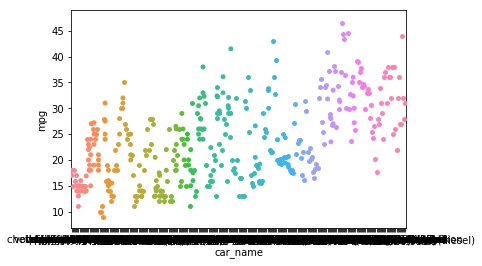

In [34]:
sns.swarmplot(x=df['car_name'], y=df.mpg)

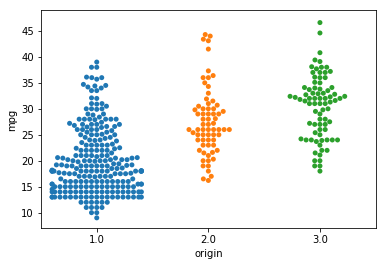

In [35]:
sns.swarmplot(x=df['origin'], y=df.mpg)

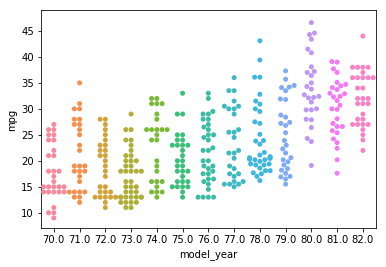

In [36]:
sns.swarmplot(x=df['model_year'], y=df.mpg)

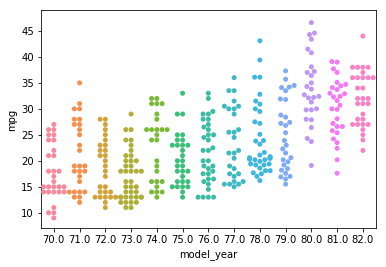

In [37]:
sns.swarmplot(x=df['model_year'], y=df.mpg)

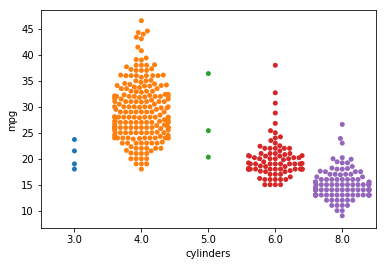

In [38]:
sns.swarmplot(x=df['cylinders'], y=df.mpg)

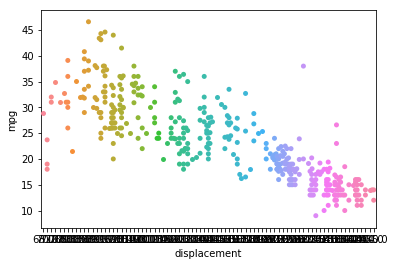

In [39]:
sns.swarmplot(x=df['displacement'], y=df.mpg)

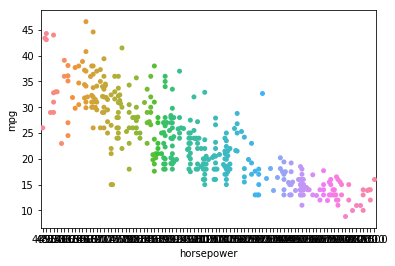

In [40]:
sns.swarmplot(x=df['horsepower'], y=df.mpg)

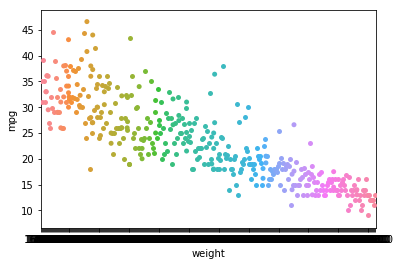

In [41]:
sns.swarmplot(x=df['weight'], y=df.mpg)

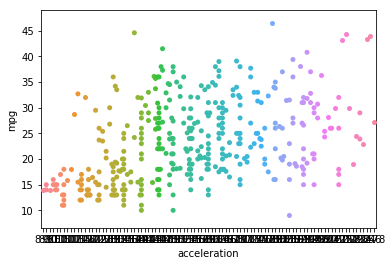

In [42]:
sns.swarmplot(x=df['acceleration'], y=df.mpg)

In [43]:
# Removing car names

In [44]:
frames = [X,dummy_years,dummy_origin]
X = pd.concat(frames,axis=1)

In [45]:
#Linear Regression without scaling
lr.fit(X,y)
print(np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

3.72738214014


In [46]:
#Linear Regression with penalty(Lasso) and without scaling
alphas = np.linspace(0.1,5,25)
best_alpha=0
best_score = 10
for num in alphas:
    ls = Lasso(alpha=num)
    ls.fit(X,y)
    score = np.sqrt(-cross_val_score(ls, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
    if score < best_score:
        best_score = score
        best_alpha = num
print("best score: {} \n and best alpha :{}".format(best_score,best_alpha))
ls = Lasso(alpha=1)
ls.fit(X,y)
print("score with alpha = 1 is: {}".format(np.sqrt(-cross_val_score(ls, X, y, cv=10, scoring='neg_mean_squared_error')).mean()))

best score: 4.011491480445142 
 and best alpha :0.1
score with alpha = 1 is: 4.3288524121231795


In [47]:
##Linear Regression with penalty(Ridge) and without scaling
alphas = np.linspace(0.1,5,25)
best_alpha=0
best_score = 10
for num in alphas:
    rd = Ridge(alpha=num)
    rd.fit(X,y)
    score = np.sqrt(-cross_val_score(rd, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
    if score < best_score:
        best_score = score
        best_alpha = num
print("best score: {} \n and best alpha :{}".format(best_score,best_alpha)) #best alpha = 2.754
rd = Ridge(alpha=1)
rd.fit(X,y)
print("score with alpha = 1 is: {}".format(np.sqrt(-cross_val_score(rd, X, y, cv=10, scoring='neg_mean_squared_error')).mean()))

best score: 3.699352644757481 
 and best alpha :1.3250000000000002
score with alpha = 1 is: 3.700761598286281


In [48]:
#KNN without scaling
best_k=0
best_value=10
for val_knn in range(1,51):
    knn = KNeighborsRegressor(val_knn)
    knn.fit(X,y)
    xx=np.sqrt(-cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
    if  xx < best_value:
        best_k = val_knn
        best_value = xx
print("Best Score: {} with k = {}".format(best_value, best_k))

Best Score: 4.150302719925888 with k = 13


In [49]:
#Random forest
best_n=0
best_value=10
for n in range(1,51):
    rf = RandomForestRegressor(n_estimators=n)
    rf.fit(X,y)
    xx = np.sqrt(-cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
    if  xx < best_value:
        best_n = val_knn
        best_value = xx
print("Best Score: {} with n_estimators = {}".format(best_value, best_n))

Best Score: 3.7555289765734408 with n_estimators = 50


In [50]:
#Random forest
from sklearn import preprocessing
X = preprocessing.scale(X)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
#Modelling after scaling the features in X

In [52]:
#lASSO
alphas = np.linspace(0.1,5,25)
best_alpha=0
best_score = 10
for num in alphas:
    ls = Lasso(alpha=num)
    ls.fit(X,y)
    score = np.sqrt(-cross_val_score(ls, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
    if score < best_score:
        best_score = score
        best_alpha = num
print("best score: {} \n and best alpha :{}".format(best_score,best_alpha))
ls = Lasso(alpha=1)
ls.fit(X,y)
print("score with alpha = 1 is: {}".format(np.sqrt(-cross_val_score(ls, X, y, cv=10, scoring='neg_mean_squared_error')).mean()))

best score: 3.711433365882118 
 and best alpha :0.1
score with alpha = 1 is: 4.312647097805915


In [53]:
#RIDGE
alphas = np.linspace(0.1,5,25)
best_alpha=0
best_score = 10
for num in alphas:
    rd = Ridge(alpha=num)
    rd.fit(X,y)
    score = np.sqrt(-cross_val_score(rd, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
    if score < best_score:
        best_score = score
        best_alpha = num
print("best score: {} \n and best alpha :{}".format(best_score,best_alpha)) #best alpha = 2.754
rd = Ridge(alpha=1)
rd.fit(X,y)
print("score with alpha = 1 is: {}".format(np.sqrt(-cross_val_score(rd, X, y, cv=10, scoring='neg_mean_squared_error')).mean()))

best score: 3.680957206637104 
 and best alpha :5.0
score with alpha = 1 is: 3.713123732671537


In [ ]:
#KNN
best_k=0
best_value=10
for val_knn in range(1,51):
    knn = KNeighborsRegressor(val_knn)
    knn.fit(X,y)
    xx=np.sqrt(-cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
    if  xx < best_value:
        best_k = val_knn
        best_value = xx
print("Best Score: {} with k = {}".format(best_value, best_k))

Best Score: 4.214911754124691 with k = 44


In [ ]:
#Random forest
best_n=0
best_value=10
for n in range(1,51):
    rf = RandomForestRegressor(n_estimators=n)
    rf.fit(X,y)
    xx = np.sqrt(-cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
    if  xx < best_value:
        best_n = val_knn
        best_value = xx
print("Best Score: {} with n_estimators = {}".format(best_value, best_n))